# Lista 5
## Magdalena Ryś 276004

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

In [48]:
def gauss_elimination(matrix_A: list[list[float]], matrix_b: list[float]) -> list[float]:
    '''
    Function:
        Funkcja rozwiązująca równanie za pomocą metody eliminacji gaussa
    Input:
        matrix_A (list of lists) - macierz A
        matrix_b (list) - lista b
    Output:
        x (list) - macierz rozwiązań
    '''
    A = [row[:] for row in matrix_A]  
    b = matrix_b[:]  
    n = len(A)

    for i in range(n - 1):
        if A[i][i] == 0: 
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    b[i], b[j] = b[j], b[i]
                    break

        for k in range(i + 1, n):
            if A[k][i] != 0:
                factor = A[k][i] / A[i][i]
                for c in range(i, n):
                    A[k][c] -= factor * A[i][c]
                b[k] -= factor * b[i]

    x = [0] * n
    for i in range(n - 1, -1, -1):
        sum_ax = 0
        for j in range(i + 1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i][i]

    return x

### Zadanie 1

 Gęstość powietrza ρ zmienia się z wysokością h w następujący sposób:

 h (km) | 0 | 3 | 6
--- | --- | --- | ---
 $x$ | 1,225 | 0,905 | 0,652

 Wyraź ρ(h) jako funkcję kwadratową w h.

Funkcja gęstości powietrza: rho(h) = 0.00372h^2 + -0.11783h + 1.22500
sprawdzenie metodą numpy: [ 0.00372222 -0.11783333  1.225     ]


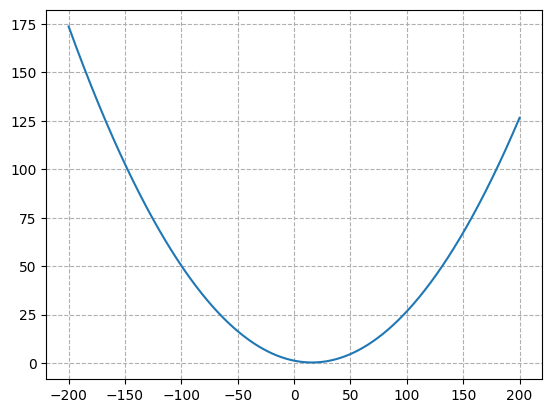

In [49]:
h = [0, 3, 6] 
rho = [1.225, 0.905, 0.652]  

def zadanie1(h, rho):
    '''
    Function:
        Funkcja aproksymująca współczynniki funkcji kwadratowej 
    Input:
        h (list) - wysokość [km]
        rho (list) - gęstość
    Output:
        macierz rozwiązań
    '''
    A = [
        [h[0]**2, h[0], 1],
        [h[1]**2, h[1], 1],
        [h[2]**2, h[2], 1]
    ]
    return gauss_elimination(A, rho)

a, b, c = zadanie1(h, rho)

print(f"Funkcja gęstości powietrza: rho(h) = {a:.5f}h^2 + {b:.5f}h + {c:.5f}")

print("sprawdzenie metodą numpy:", np.polyfit(h, rho, 2))

def funkcja_zad1(x):
    a, b, c = zadanie1(h, rho)
    return a*x**2 + b*x + c

lin = np.linspace(-200, 200, 1000)

plt.plot(lin, funkcja_zad1(lin))
plt.grid(linestyle="--")
plt.show()

### Zadanie 2
W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w
cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji
sklejanych, znajdź $c_D$ dla $Re = 5$, $50$, i $5000$.

$R_e$ | 0,2 | 2 | 20 | 200 | 2000 | 20 000
--- | --- | --- | --- | --- | --- | ---
$C_D$ | 103 | 13,9 | 2,7 | 0,8 | 0,401 | 0,433

[ -88.94129732  458.23535231 9920.05365109]
sprawdzenie metodą numpy: [np.float64(-96.1015828188588), np.float64(2581.0368171146993), np.float64(1658414342.1563685)]


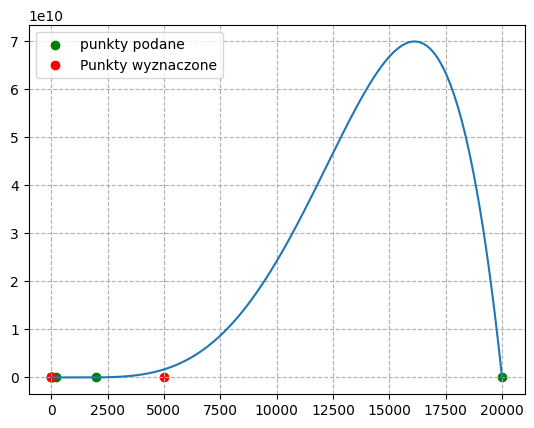

In [50]:
Re_values = np.array([0.2, 2, 20, 200, 2000, 20000])
cD_values = np.array([103, 13.9, 2.7, 0.8, 0.401, 0.433])
points = np.array([5, 50, 5000])

spline = CubicSpline(Re_values, cD_values, bc_type="natural")
spline_results = spline(points)
print(spline_results)

check = np.polyfit(Re_values, cD_values, 5)
print("sprawdzenie metodą numpy:", [np.polyval(check, x) for x in points])

def funkcja_zad2(x):
    vasl = np.polyfit(Re_values, cD_values, 5)
    return np.polyval(vasl, x)

lin = np.linspace(0, 20000, 1000)

plt.plot(lin, funkcja_zad2(lin))
plt.scatter(Re_values, cD_values, color='g', label='punkty podane')
plt.scatter(points, spline_results, color="r", label="Punkty wyznaczone")
plt.legend()
plt.grid(linestyle="--")
plt.show()

### Zadanie 3
Rozwiąż zad. 2 przy pomocy interpolacji wielomianowej.

In [51]:
def zadanie3(x, y, points):
    '''
    Function:
        Funkcja aproksymująca wartości funkcji dla podanych wartości metodą interpolacji wielomianowej
    Input:
        x (list) - zbiór argumentów funkcji
        y (list) - zbiór wartości funkcji
        points (list) - argumenty dla których szukamy wartości
    Output:
        result (list) - szukane wartości
    '''
    n = len(x)

    lists = np.zeros((n, n))
    lists[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            lists[i, j] = (lists[i + 1, j - 1] - lists[i, j - 1]) / (x[i + j] - x[i])

    results = []
    for p in points:
        value = lists[0, 0]
        term = 1
        for j in range(1, n):
            term *= (p - x[j - 1])
            value += lists[0, j] * term
        results.append(value)
    
    return results

wynik metodą interpolacji wielomianowej:  [np.float64(-96.10134478690838), np.float64(2581.0341924618033), np.float64(1658412635.5851185)]
sprawdzenie metodą numpy: [np.float64(-96.1015828188588), np.float64(2581.0368171146993), np.float64(1658414342.1563685)]


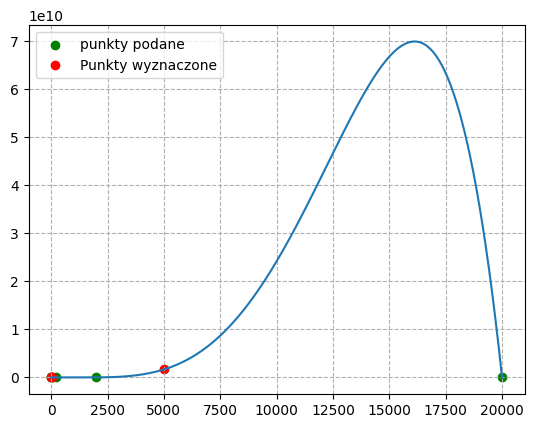

In [52]:
res = zadanie3(Re_values, cD_values, points)
print("wynik metodą interpolacji wielomianowej: ", res)
check = np.polyfit(Re_values, cD_values, 5)
print("sprawdzenie metodą numpy:", [np.polyval(check, x) for x in points])

def funkcja_zad3(x):
    vasl = np.polyfit(Re_values, cD_values, 5)
    return np.polyval(vasl, x)

lin = np.linspace(0, 20000, 1000)

plt.plot(lin, funkcja_zad3(lin))
plt.scatter(Re_values, cD_values, color='g', label='punkty podane')
plt.scatter(points, res, color="r", label="Punkty wyznaczone")
plt.legend()
plt.grid(linestyle="--")
plt.show()

### Zadanie 4
Wyznacz parametry $a$ i $b$ tak, aby funkcja $f(x) = ae^{bx}$ aproksymowała
poniższe dane w sensie najmniejszych kwadratów.

x | 1,2 | 2,8 | 4,3 | 5,4 | 6,8 | 7,9
--- | --- | --- | --- | --- | --- | ---
y | 7,5 | 16,1 | 38,9 | 67,0 | 146,6 | 266,2

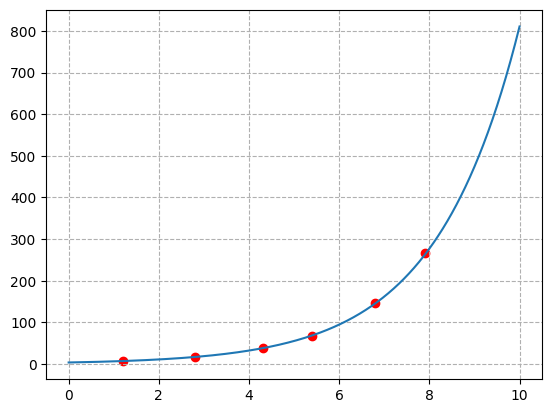

In [53]:
def zadanie4(x, y):
    '''
    Function:
        Funkcja aproksymująca wartości funkcji dla podanych wartości metodą naturalnych funkcji sklejanych
    Input:
        x (list) - zbiór argumentów funkcji
        y (list) - zbiór wartości funkcji
    Output:
        a (float)
        b (float)
    '''
    Y = np.log(y) 
    n = len(x)

    sum_x = np.sum(x)
    sum_Y = np.sum(Y)
    sum_xY = np.sum(x * Y)
    sum_x2 = np.sum(x**2)

    B = (n * sum_xY - sum_x * sum_Y) / (n * sum_x2 - sum_x**2)
    A = (sum_Y - B * sum_x) / n

    a = np.exp(A)
    b = B

    return a, b

def funkcja_zad4(x):
    a, b = zadanie4(x_data, y_data)
    return a * np.exp(b * x)

x_data = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
y_data = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])
lin = np.linspace(0, 10, 1000)

plt.plot(lin, funkcja_zad4(lin))
plt.scatter(x_data, y_data, color='red')  
plt.grid(linestyle="--")
plt.show()


### Zadanie 5

Kinematyczna lepkość wody $µ_k$ zmienia się z temperaturą T według poniższej tabeli. Wyznacz wielomian trzeciego stopnia, który najlepiej aproksymuje te dane i skorzystaj z niego do obliczenia $µ_k$ dla $T = 10^{\circ}$, $30^{\circ}$, $60^{\circ}$ i $90^{\circ}$.

T | 0 | 21,1 | 37,8 | 54,4 | 71,1 | 87,8 | 100
--- | --- | --- | --- | --- | --- | --- | ---
$µ_k$ $10^{-3} \ \frac{m}{s^2}$ | 1,79 | 1,13 | 0,696 | 0,519 | 0,338 | 0,321 | 0,296 

In [54]:
def zadanie5(T, mu_k):
    '''
    Function:
        Funkcja aproksymująca współczynniki funkcji wielomianowej trzeciego stopnia
    Input:
        T (list) - temperatura
        mu_k (list) - lepkość
    Output:
        coefficients (list) - współczynniki wielomianu
    '''
    n = len(T)
    A = np.array([[T[i]**3, T[i]**2, T[i], 1] for i in range(n)])
    b = np.array(mu_k)  
    
    coefficients = gauss_elimination(A.T @ A, A.T @ b)
    return coefficients

Współczynniki wielomianu: a = -8.458861661546282e-07, b = 0.00032856916419528824, c = -0.03932127974479424, d = 1.7957089455664115 

Wartości dla podanych temperatur:  [np.float64(1.4345071783718433), np.float64(0.8889438745121687), np.float64(0.43656974009239513), np.float64(0.3015529833900408)]
sprawdzenie wartośco metodą numpy: [np.float64(1.4345071783718335), np.float64(0.8889438745121383), np.float64(0.4365697400924058), np.float64(0.3015529833900541)]


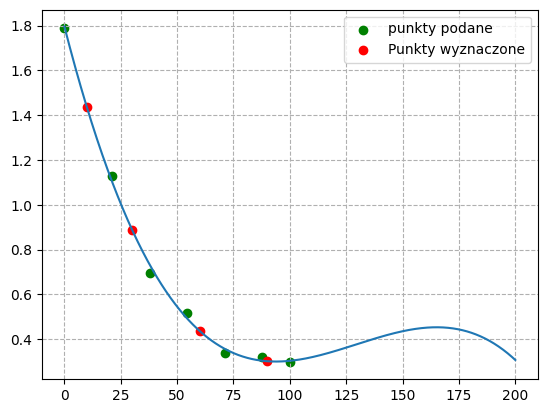

In [55]:
T = [0, 21.1, 37.8, 54.4, 71.1, 87.8, 100] 
mu_k = [1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296]  

coefficients = zadanie5(T, mu_k)
a, b, c, d = coefficients

def polynomial(T, a, b, c, d):
    return a * T**3 + b * T**2 + c * T + d

temperatures = [10, 30, 60, 90]
results = [polynomial(t, a, b, c, d) for t in temperatures]

print(f"Współczynniki wielomianu: a = {a}, b = {b}, c = {c}, d = {d} \n")
print("Wartości dla podanych temperatur: ", results)

check = np.polyfit(T, mu_k, 3)
print("sprawdzenie wartośco metodą numpy:", [np.polyval(check, x) for x in temperatures])

def funkcja_zad5(x):
    vasl = zadanie5(T, mu_k)
    return np.polyval(vasl, x)

lin = np.linspace(0, 200, 1000)

plt.plot(lin, funkcja_zad5(lin))
plt.scatter(T, mu_k, color='g', label='punkty podane')
plt.scatter(temperatures, results, color="r", label="Punkty wyznaczone")
plt.legend()
plt.grid(linestyle="--")
plt.show()

### Zadanie 6
Dopasuj funkcję liniową i kwadratową do danych

x | 1 | 2,5 | 3,5 | 4 | 1,1 | 1,8 | 2,2 | 3,7
--- | --- | --- | --- | --- | --- | --- | --- | ---
y | 6,008 | 15,722 | 27,13 | 33,772 | 5,257 | 9,549 | 11,098 | 28,828 

Wyniki przedstaw na wykresie. Która aproksymacja jest lepsza?

In [56]:
def zadanie6_linear(x, y):
    '''
    Function:
        Funkcja aproksymująca współczynniki funkcji liniowej
    Input:
        x (list) - lista argumentów
        y (list) - lista wartości
    Output:
        coefficients (list) - współczynniki wielomianu
    '''
    n = len(x)
    A = np.array([[x[i], 1] for i in range(n)])
    b = np.array(y)  
    
    coefficients = gauss_elimination(A.T @ A, A.T @ b)
    return coefficients

def zadanie6_square(x, y):
    '''
    Function:
        Funkcja aproksymująca współczynniki funkcji kwadratowej
    Input:
        x (list) - lista argumentów
        y (list) - lista wartości
    Output:
        coefficients (list) - współczynniki wielomianu
    '''
    n = len(x)
    A = np.array([[x[i]**2, x[i], 1] for i in range(n)])
    b = np.array(y)  
    
    coefficients = gauss_elimination(A.T @ A, A.T @ b)
    return coefficients

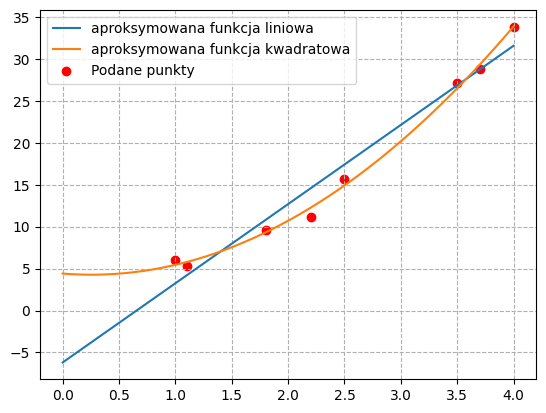

In [57]:
x = np.array([1, 2.5, 3.5, 4, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

a_l, b_l = zadanie6_linear(x, y)
a_s, b_s, c_s = zadanie6_square(x, y)

x_range = np.linspace(0, 4, 1000)

plt.plot(x_range, linear(x_range, a_l, b_l), label='aproksymowana funkcja liniowa')
plt.plot(x_range, quadratic(x_range, a_s, b_s, c_s), label='aproksymowana funkcja kwadratowa')
plt.scatter(x, y, color='red', label='Podane punkty')
plt.grid(linestyle='--')
plt.legend()
plt.show()

Jak widać, lepszą aproksymacją jest tu funkcja kwadratowa